In [2]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


In [21]:
# 1. Upload and Load Dataset
file_path = r'C:\Users\afifn\Desktop\CDS511\Project\511data_full\combined_UniqloDataset.csv'
data = pd.read_csv(file_path)  # Load the dataset

In [22]:
data.head()

,postId,User Id,User Name,Comment Id,Comment Text,Profile URL,Avatar URL,Publish Date
0,C--K9-NsKhT,3914240351,syxffql,18013413416566467,🔥🔥🔥,https://www.instagram.com/syxffql,https://instagram.fkul6-3.fna.fbcdn.net/v/t51....,"8/22/2024, 8:30:08 PM"
1,C--K9-NsKhT,1329437977,foto.je.nik,18455063731015288,Scalper where you at?,https://www.instagram.com/foto.je.nik,https://instagram.fkul6-2.fna.fbcdn.net/v/t51....,"8/22/2024, 8:31:12 PM"
2,C--K9-NsKhT,56885944175,nurinareza,18023001164109488,Lurving Andy’s jacket so much!!!❤️❤️❤️🙌🙌,https://www.instagram.com/nurinareza,https://instagram.fkul6-2.fna.fbcdn.net/v/t51....,"8/22/2024, 9:31:58 PM"
3,C--K9-NsKhT,1546782870,hisyamuddin.azhar,17981486720723749,Ineedit,https://www.instagram.com/hisyamuddin.azhar,https://instagram.fkul6-2.fna.fbcdn.net/v/t51....,"8/22/2024, 11:14:57 PM"
4,C--K9-NsKhT,181106611,ashrafekhart,18031462138993081,@ajim_jasni ejah so,https://www.instagram.com/ashrafekhart,https://instagram.fkul6-4.fna.fbcdn.net/v/t51....,"8/22/2024, 11:27:29 PM"


# Sentiment Analysis

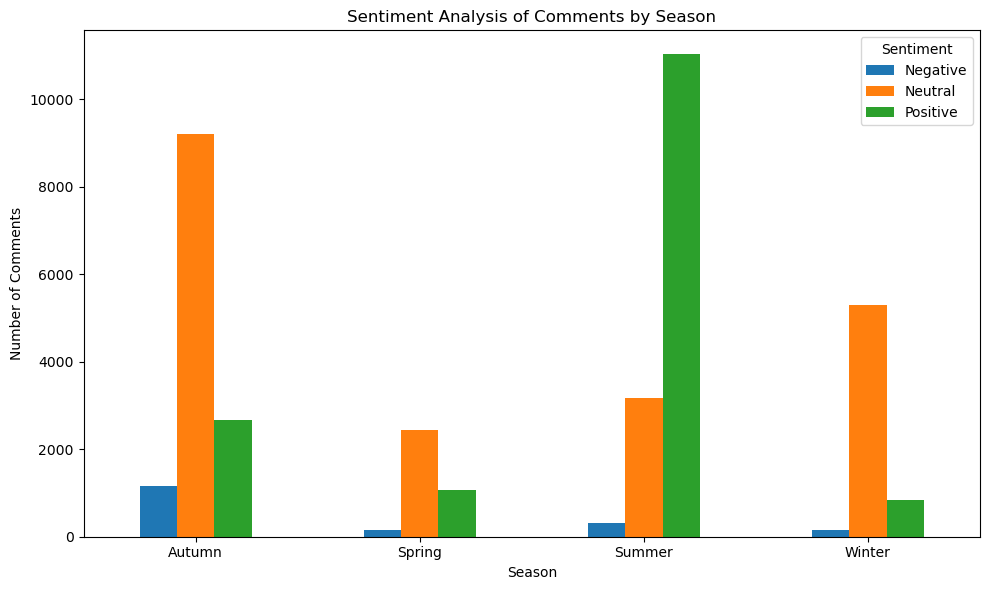

In [23]:
# Convert the 'Publish Date' column to datetime
# Handle multiple date formats

def parse_date(date_str):
    formats = ['%m/%d/%Y, %I:%M:%S %p', '%d/%m/%Y, %H:%M:%S']
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matches

data['Publish Date'] = data['Publish Date'].apply(parse_date)

# Drop rows with unparsed dates
data = data.dropna(subset=['Publish Date'])

# Extract the month
data['Month'] = data['Publish Date'].dt.month

# Define seasons
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11]
}

def map_to_season(month):
    for season, months in seasons.items():
        if month in months:
            return season

# Map months to seasons
data['Season'] = data['Month'].apply(map_to_season)

# Define a function to analyze sentiment
def categorize_sentiment(comment):
    analysis = TextBlob(comment).sentiment
    if analysis.polarity > 0:
        return 'Positive'
    elif analysis.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Clean and analyze sentiment
# Ensure 'Comment Text' contains valid strings
data = data[data['Comment Text'].notna()]
data['Comment Text'] = data['Comment Text'].astype(str)
data['Sentiment'] = data['Comment Text'].apply(categorize_sentiment)

# Group by season and sentiment
seasonal_sentiment = data.groupby(['Season', 'Sentiment']).size().unstack(fill_value=0)

# Visualize the results
seasonal_sentiment.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Analysis of Comments by Season')
plt.ylabel('Number of Comments')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\afifn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


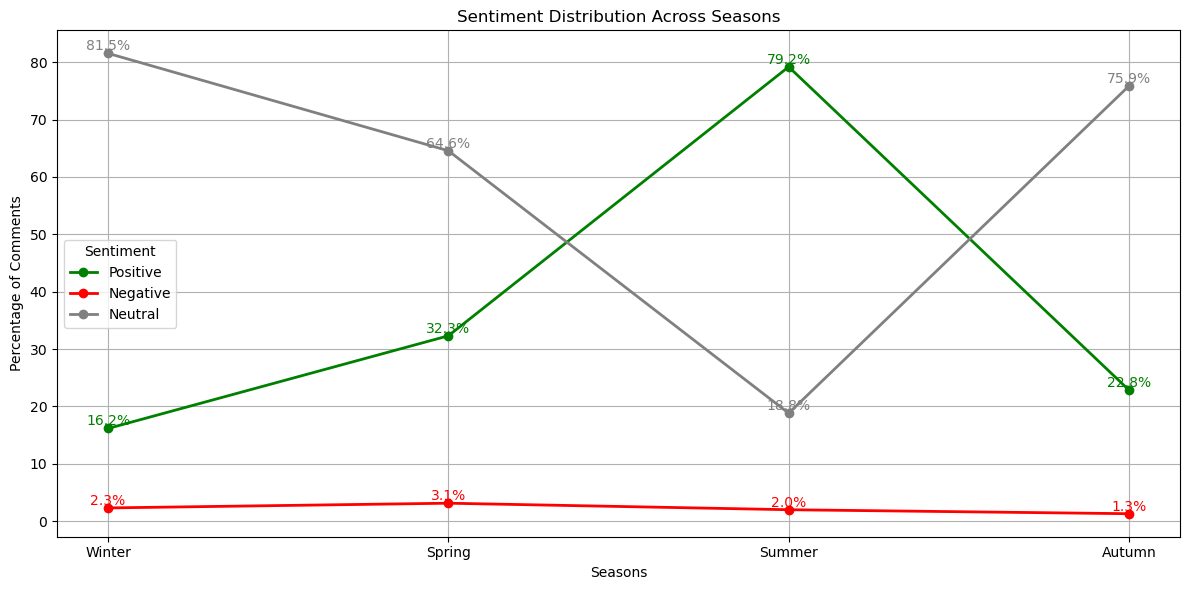

In [7]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt



# Convert the 'Publish Date' column to datetime
# Handle multiple date formats

def parse_date(date_str):
    formats = ['%m/%d/%Y, %I:%M:%S %p', '%d/%m/%Y, %H:%M:%S']
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matches

data['Publish Date'] = data['Publish Date'].apply(parse_date)

# Drop rows with unparsed dates
data = data.dropna(subset=['Publish Date'])

# Extract the month
data['Month'] = data['Publish Date'].dt.month

# Define seasons
seasons = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11]
}

def map_to_season(month):
    for season, months in seasons.items():
        if month in months:
            return season

# Map months to seasons
data['Season'] = data['Month'].apply(map_to_season)

# Define a function to analyze sentiment using VADER
def categorize_vader_sentiment(comment):
    scores = analyzer.polarity_scores(comment)
    if scores['compound'] > 0.05:
        return 'Positive'
    elif scores['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Clean and analyze sentiment
# Ensure 'Comment Text' contains valid strings
data = data[data['Comment Text'].notna()]
data['Comment Text'] = data['Comment Text'].astype(str)
data['Sentiment'] = data['Comment Text'].apply(categorize_vader_sentiment)

# Group by season and sentiment for distribution
seasonal_sentiment = data.groupby(['Season', 'Sentiment']).size().unstack(fill_value=0)

# Normalize the counts to percentages
seasonal_sentiment_percentage = seasonal_sentiment.div(seasonal_sentiment.sum(axis=1), axis=0) * 100

# Plot the sentiment distribution across seasons
plt.figure(figsize=(12, 6))
seasons_order = ['Winter', 'Spring', 'Summer', 'Autumn']

# Plot each sentiment with specified colors and bold lines
plt.plot(seasons_order, seasonal_sentiment_percentage.loc[seasons_order, 'Positive'], 
         label='Positive', marker='o', color='green', linewidth=2)
plt.plot(seasons_order, seasonal_sentiment_percentage.loc[seasons_order, 'Negative'], 
         label='Negative', marker='o', color='red', linewidth=2)
plt.plot(seasons_order, seasonal_sentiment_percentage.loc[seasons_order, 'Neutral'], 
         label='Neutral', marker='o', color='grey', linewidth=2)

# Annotate each point with its value
for season in seasons_order:
    plt.text(season, seasonal_sentiment_percentage.loc[season, 'Positive'], 
             f"{seasonal_sentiment_percentage.loc[season, 'Positive']:.1f}%", 
             color='green', ha='center', va='bottom', fontsize=10)
    plt.text(season, seasonal_sentiment_percentage.loc[season, 'Negative'], 
             f"{seasonal_sentiment_percentage.loc[season, 'Negative']:.1f}%", 
             color='red', ha='center', va='bottom', fontsize=10)
    plt.text(season, seasonal_sentiment_percentage.loc[season, 'Neutral'], 
             f"{seasonal_sentiment_percentage.loc[season, 'Neutral']:.1f}%", 
             color='grey', ha='center', va='bottom', fontsize=10)

plt.title('Sentiment Distribution Across Seasons')
plt.xlabel('Seasons')
plt.ylabel('Percentage of Comments')
plt.legend(title='Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
data['Comment Text']

0                                                    🔥🔥🔥
1                                  Scalper where you at?
2               Lurving Andy’s jacket so much!!!❤️❤️❤️🙌🙌
3                                                Ineedit
4                                    @ajim_jasni ejah so
                              ...                       
37573                                  @nafeesisboujee 😎
37574    I wish nafeesisboujee would have been the model
37575                               @uniqlomyofficial 😍🤩
37576                                    I love nafeesss
37577                        @nafeesisboujee soo fire 🔥🔥
Name: Comment Text, Length: 37506, dtype: object

In [26]:
data['Sentiment']

0         Neutral
1         Neutral
2         Neutral
3         Neutral
4         Neutral
           ...   
37573     Neutral
37574     Neutral
37575     Neutral
37576    Positive
37577     Neutral
Name: Sentiment, Length: 37506, dtype: object

In [10]:
# Extract top 5 comments for each sentiment in each season
top_comments = {}

for season in data['Season'].unique():
    season_data = data[data['Season'] == season]
    top_comments[season] = {}
    for sentiment in ['Positive', 'Negative', 'Neutral']:
        sentiment_data = season_data[season_data['Sentiment'] == sentiment]
        top_comments[season][sentiment] = sentiment_data[['Comment Text', 'Sentiment']].head(5)

# Combine the results into a single DataFrame for easy display
top_comments_combined = pd.concat(
    [
        pd.concat(top_comments[season].values(), keys=top_comments[season].keys(), names=['Sentiment'])
        for season in top_comments.keys()
    ],
    keys=top_comments.keys(),
    names=['Season']
)

# Display the results
print(top_comments_combined)


                                                             Comment Text  \
Season Sentiment                                                            
Summer Positive  9                    Congrats Kirin! 👏🏼😍@bungadanbintang   
                 15     @jshamsul_ Hi! Thanks for your feedback, we’ll...   
                 17                Congratulations Kirin @bungadanbintang   
                 18                               @mombebel thank youuu ❤   
                 20                          @safiyaazland Yes you can! 🙌   
       Negative  12     How about making it available online for those...   
                 25                                          Why no 3XL 😢   
                 37                              I don’t see it online :(   
                 48               @rapha.el.john they did Ravenclaw dirty   
                 59     Can't get the link after the live ended it aut...   
       Neutral   0                                                    🔥🔥🔥   

In [11]:
# Group data by season and postId, then calculate average sentiment scores for each post
data['compound'] = data['Comment Text'].apply(lambda comment: analyzer.polarity_scores(comment)['compound'])

# Group by season and postId to calculate mean compound scores
season_post_sentiments = data.groupby(['Season', 'postId'])['compound'].mean().reset_index()

# Find the highest positive and negative sentiment posts for each season
highest_positive_negative_posts = {}
for season in data['Season'].unique():
    season_data = season_post_sentiments[season_post_sentiments['Season'] == season]
    highest_positive_post = season_data.loc[season_data['compound'].idxmax()]
    highest_negative_post = season_data.loc[season_data['compound'].idxmin()]
    highest_positive_negative_posts[season] = {
        'Highest Positive': highest_positive_post,
        'Highest Negative': highest_negative_post
    }

# Convert the result into a readable DataFrame
highest_posts_df = pd.DataFrame({
    season: {
        'Highest Positive PostId': highest_positive_negative_posts[season]['Highest Positive']['postId'],
        'Highest Positive Score': highest_positive_negative_posts[season]['Highest Positive']['compound'],
        'Highest Negative PostId': highest_positive_negative_posts[season]['Highest Negative']['postId'],
        'Highest Negative Score': highest_positive_negative_posts[season]['Highest Negative']['compound']
    } for season in highest_positive_negative_posts
}).T

# Display the DataFrame
print(highest_posts_df)


       Highest Positive PostId Highest Positive Score Highest Negative PostId  \
Summer             C9wYxtyvqTq                  0.849             C4m1XORpfw0   
Autumn             DByPiqnJSw0                 0.9346             DApPpcfMycr   
Winter             DBkd822JMBX                 0.8672             DDgmariI9b-   
Spring             C6qe2pGJ3oY               0.655351             C2HtoMsJhCz   

       Highest Negative Score  
Summer                -0.3818  
Autumn                 -0.296  
Winter                -0.8468  
Spring                -0.5106  


In [12]:
# Group data by season and postId, and count comments
season_post_comment_count = data.groupby(['Season', 'postId']).size().reset_index(name='comment_count')

# Find the post with the highest number of comments for each season
top_posts = season_post_comment_count.loc[season_post_comment_count.groupby('Season')['comment_count'].idxmax()]

# Merge with the original data to get sentiment information
top_posts_with_sentiments = pd.merge(
    top_posts,
    data[['postId', 'compound']],
    on='postId',
    how='left'
).drop_duplicates()

# Group sentiment scores by season and calculate average sentiment for the top posts
top_posts_with_sentiments_summary = top_posts_with_sentiments.groupby('Season').agg(
    Highest_Comment_PostId=('postId', 'first'),
    Comment_Count=('comment_count', 'first'),
    Average_Sentiment=('compound', 'mean')
).reset_index()

# Display the result
print(top_posts_with_sentiments_summary)

   Season Highest_Comment_PostId  Comment_Count  Average_Sentiment
0  Autumn            DAk-hkStQfl           6570           0.511628
1  Spring            C6Gap_3SGo9            512           0.397320
2  Summer            C-SLsyVtxvn          11192           0.715911
3  Winter            C3pNLNipVo9           1526           0.439024


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\afifn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


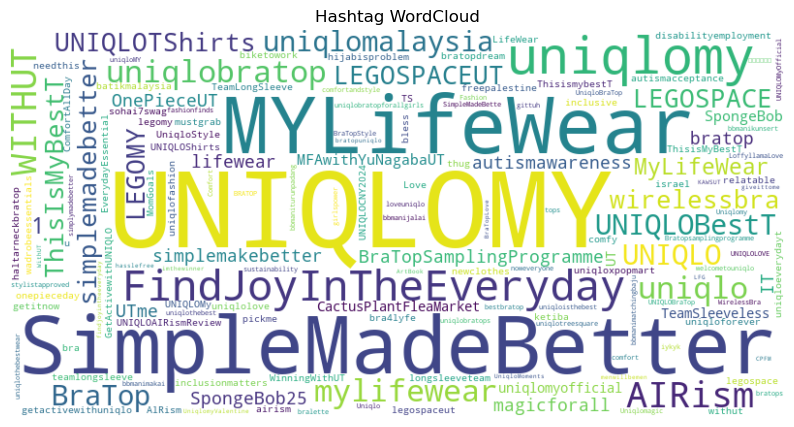

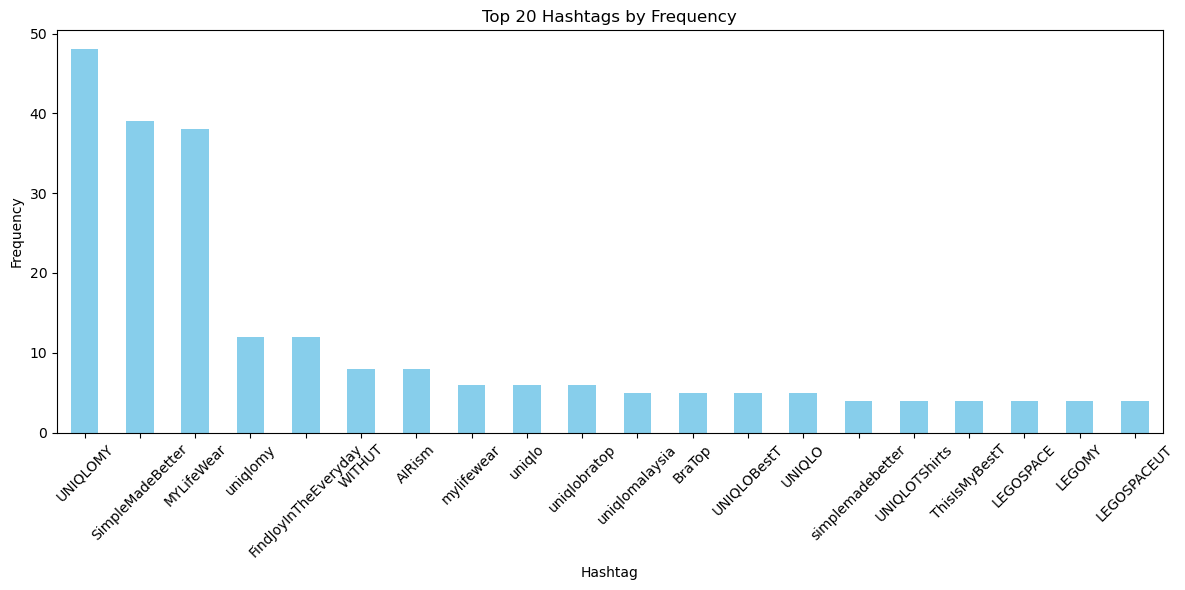

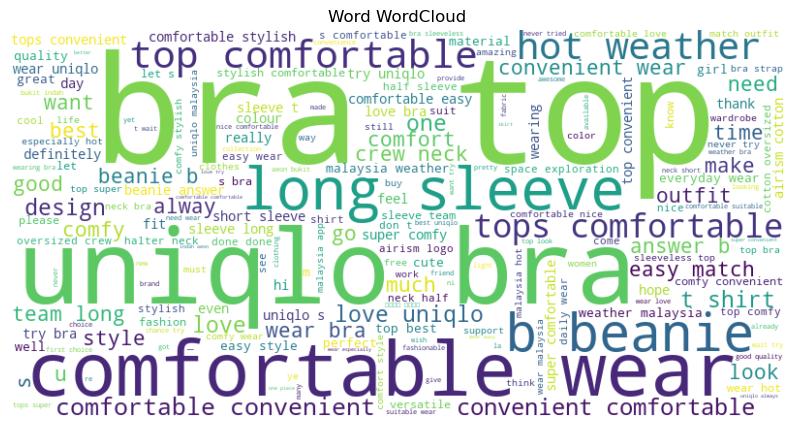

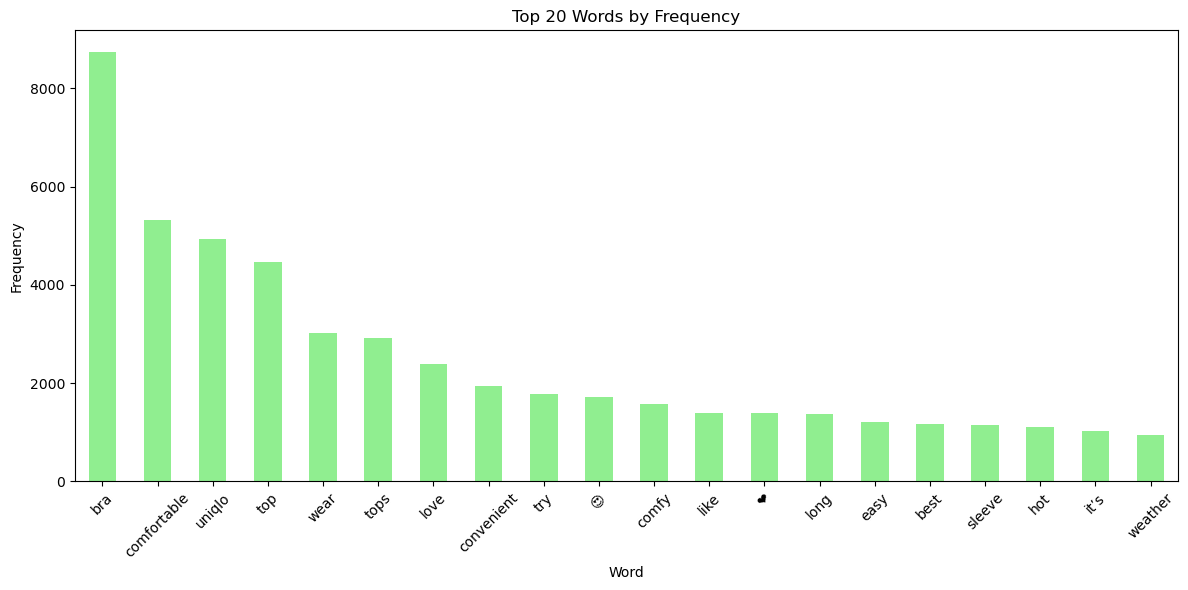

In [13]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter

# Download stopwords if not already available
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Extract hashtags from comments
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

data['Hashtags'] = data['Comment Text'].apply(extract_hashtags)

# Flatten the list of hashtags and count frequencies
all_hashtags = [hashtag for hashtags in data['Hashtags'] for hashtag in hashtags]
hashtag_frequencies = pd.Series(all_hashtags).value_counts()

# Generate a wordcloud for hashtags
hashtag_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_frequencies)

# Display the hashtag wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(hashtag_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtag WordCloud')
plt.show()

# Plot hashtag frequencies as a bar graph
plt.figure(figsize=(12, 6))
hashtag_frequencies.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Hashtags by Frequency')
plt.ylabel('Frequency')
plt.xlabel('Hashtag')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate a wordcloud for general words in comments with preprocessing
def preprocess_text(text):
    # Remove hashtags, mentions, and URLs
    text = re.sub(r"#(\w+)|@(\w+)|http\S+", "", text)
    # Lowercase the text
    text = text.lower()
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

data['Processed Text'] = data['Comment Text'].apply(preprocess_text)

# Combine all text for the wordcloud
all_words = " ".join(data['Processed Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=None).generate(all_words)

# Display the word wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word WordCloud')
plt.show()

# Plot word frequencies as a bar graph
word_list = all_words.split()
word_frequencies = Counter(word_list)
word_frequencies_series = pd.Series(word_frequencies).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
word_frequencies_series.head(20).plot(kind='bar', color='lightgreen')
plt.title('Top 20 Words by Frequency')
plt.ylabel('Frequency')
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\afifn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


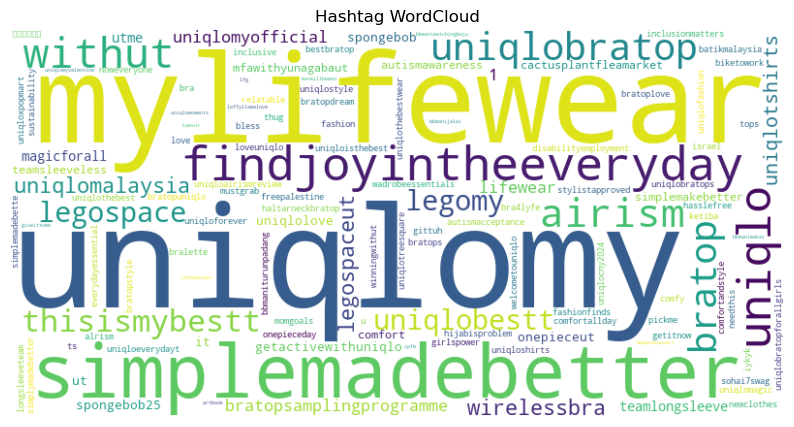

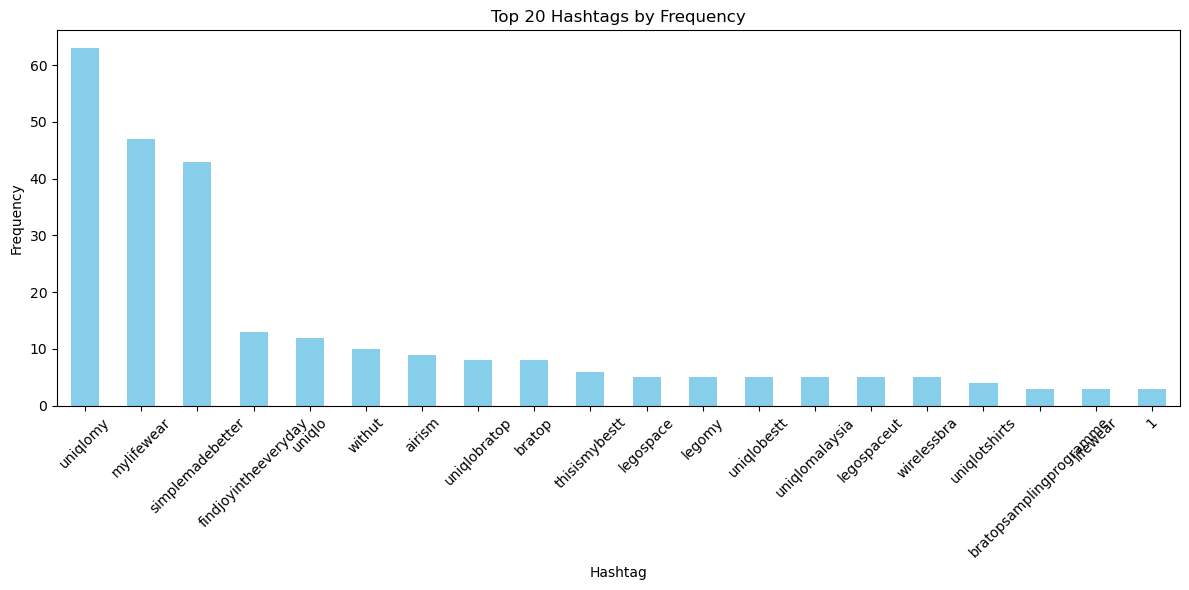

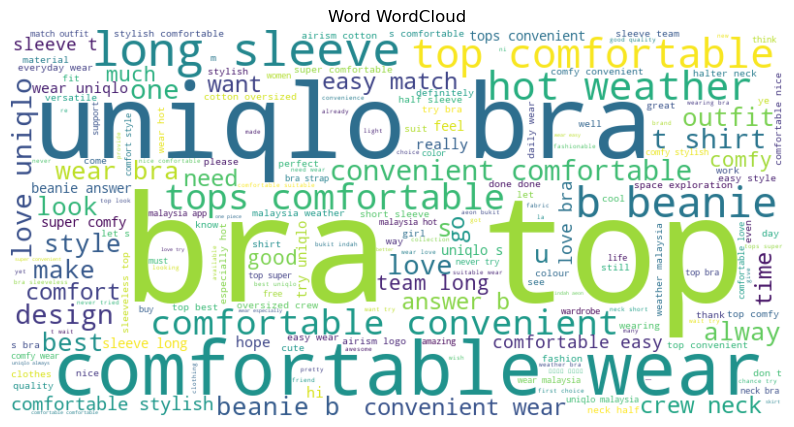

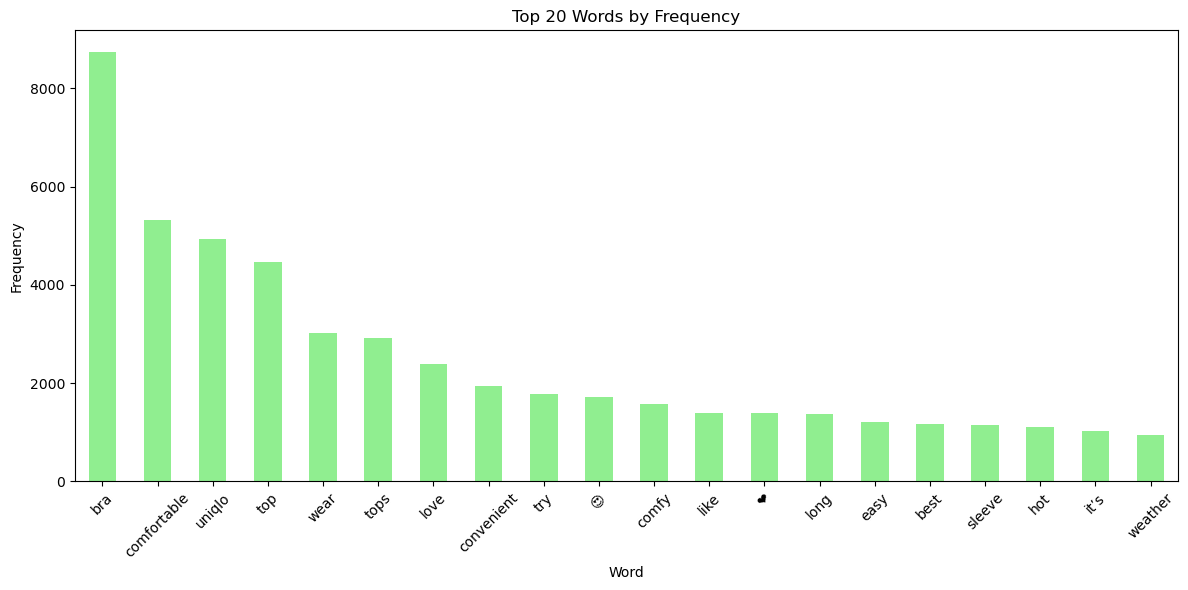

In [14]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter

# Download stopwords if not already available
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Extract hashtags from comments
def extract_hashtags(text):
    return [hashtag.lower() for hashtag in re.findall(r"#(\w+)", text)]

data['Hashtags'] = data['Comment Text'].apply(extract_hashtags)

# Flatten the list of hashtags and count frequencies
all_hashtags = [hashtag for hashtags in data['Hashtags'] for hashtag in hashtags]
hashtag_frequencies = pd.Series(all_hashtags).value_counts()

# Generate a wordcloud for hashtags
hashtag_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_frequencies)

# Display the hashtag wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(hashtag_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtag WordCloud')
plt.show()

# Plot hashtag frequencies as a bar graph
plt.figure(figsize=(12, 6))
hashtag_frequencies.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Hashtags by Frequency')
plt.ylabel('Frequency')
plt.xlabel('Hashtag')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate a wordcloud for general words in comments with preprocessing
def preprocess_text(text):
    # Remove hashtags, mentions, and URLs
    text = re.sub(r"#(\w+)|@(\w+)|http\S+", "", text)
    # Lowercase the text
    text = text.lower()
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

data['Processed Text'] = data['Comment Text'].apply(preprocess_text)

# Combine all text for the wordcloud
all_words = " ".join(data['Processed Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=None).generate(all_words)

# Display the word wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word WordCloud')
plt.show()

# Plot word frequencies as a bar graph
word_list = all_words.split()
word_frequencies = Counter(word_list)
word_frequencies_series = pd.Series(word_frequencies).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
word_frequencies_series.head(20).plot(kind='bar', color='lightgreen')
plt.title('Top 20 Words by Frequency')
plt.ylabel('Frequency')
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


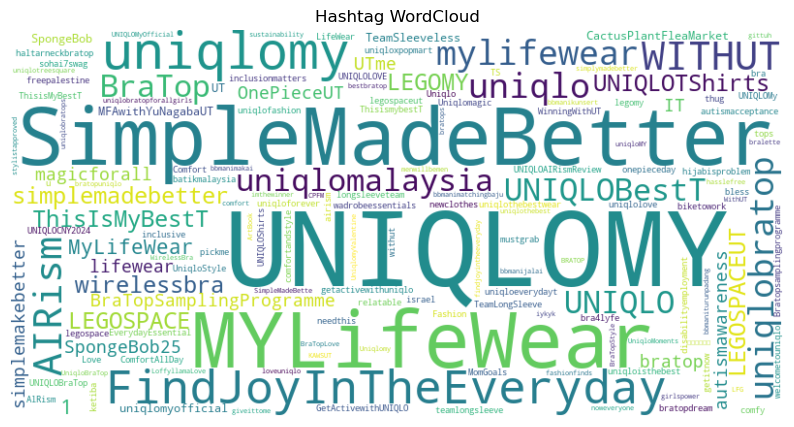

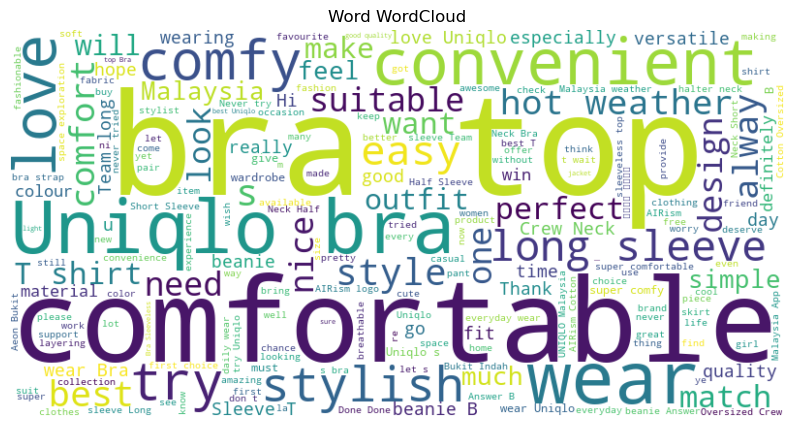

In [15]:
import re
from wordcloud import WordCloud

# Extract hashtags from comments
def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

data['Hashtags'] = data['Comment Text'].apply(extract_hashtags)

# Flatten the list of hashtags and count frequencies
all_hashtags = [hashtag for hashtags in data['Hashtags'] for hashtag in hashtags]
hashtag_frequencies = pd.Series(all_hashtags).value_counts()

# Generate a wordcloud for hashtags
hashtag_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_frequencies)

# Display the hashtag wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(hashtag_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtag WordCloud')
plt.show()

# Generate a wordcloud for general words in comments
def preprocess_text(text):
    # Remove hashtags, mentions, and URLs
    text = re.sub(r"#(\w+)|@(\w+)|http\S+", "", text)
    return text

data['Processed Text'] = data['Comment Text'].apply(preprocess_text)

# Combine all text for the wordcloud
all_words = " ".join(data['Processed Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=None).generate(all_words)

# Display the word wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word WordCloud')
plt.show()

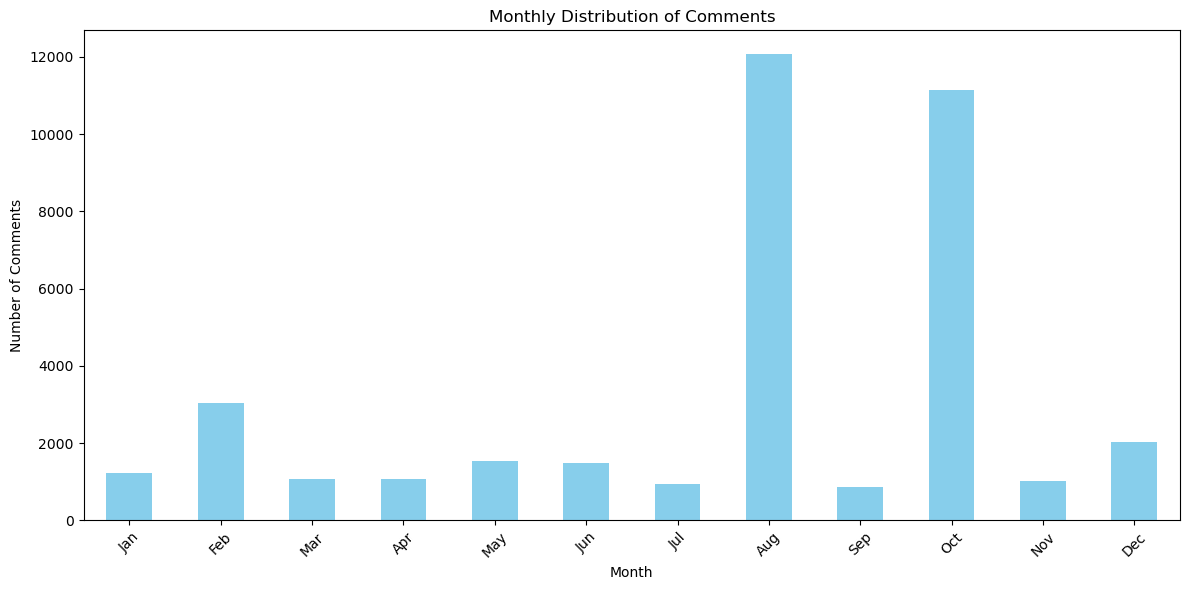

In [27]:
# Convert the 'Publish Date' column to datetime

def parse_date(date_str):
    formats = ['%m/%d/%Y, %I:%M:%S %p', '%d/%m/%Y, %H:%M:%S']
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matches

data['Publish Date'] = data['Publish Date'].apply(parse_date)
data = data.dropna(subset=['Publish Date'])

# Extract the month
data['Month'] = data['Publish Date'].dt.month

# Count the number of comments per month
monthly_distribution = data['Month'].value_counts().sort_index()

# Plot the monthly distribution
plt.figure(figsize=(12, 6))
monthly_distribution.plot(kind='bar', color='skyblue')
plt.title('Monthly Distribution of Comments')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.tight_layout()
plt.show()

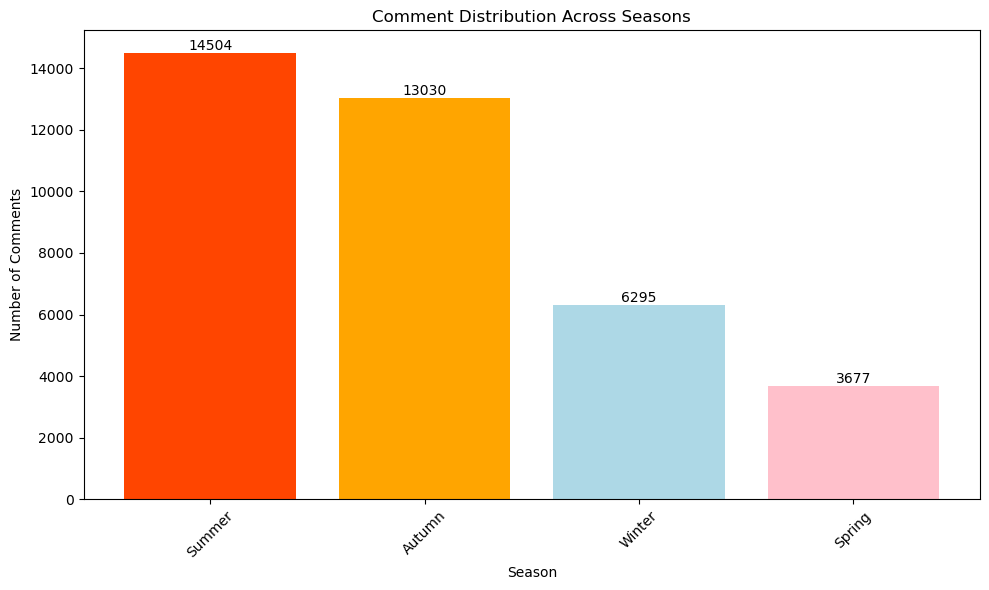

In [28]:
# Convert the 'Publish Date' column to datetime

def parse_date(date_str):
    formats = ['%m/%d/%Y, %I:%M:%S %p', '%d/%m/%Y, %H:%M:%S']
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matches

data['Publish Date'] = data['Publish Date'].apply(parse_date)
data = data.dropna(subset=['Publish Date'])

# Extract the month
data['Month'] = data['Publish Date'].dt.month

# Map months to seasons
data['Season'] = data['Month'].apply(map_to_season)

# Count the number of comments per season
comment_distribution = data['Season'].value_counts()

# Plot the comment distribution across seasons
plt.figure(figsize=(10, 6))
bars = plt.bar(comment_distribution.index, comment_distribution.values, color=['orangered', 'orange', 'lightblue', 'pink'])

# Add labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1, f'{int(bar.get_height())}',
             ha='center', va='bottom', color='black', fontsize=10)

plt.title('Comment Distribution Across Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total Unique Users: 27365
Top 10 Users by Comment Count:
      User Id  Comment Count
0  1733925848           1245
1    47590696            140
2  2268330488             56
3    18845455             54
4     1954716             43
5  1595734324             30
6   241895644             28
7    31654027             24
8  1369208440             22
9  1292421084             21


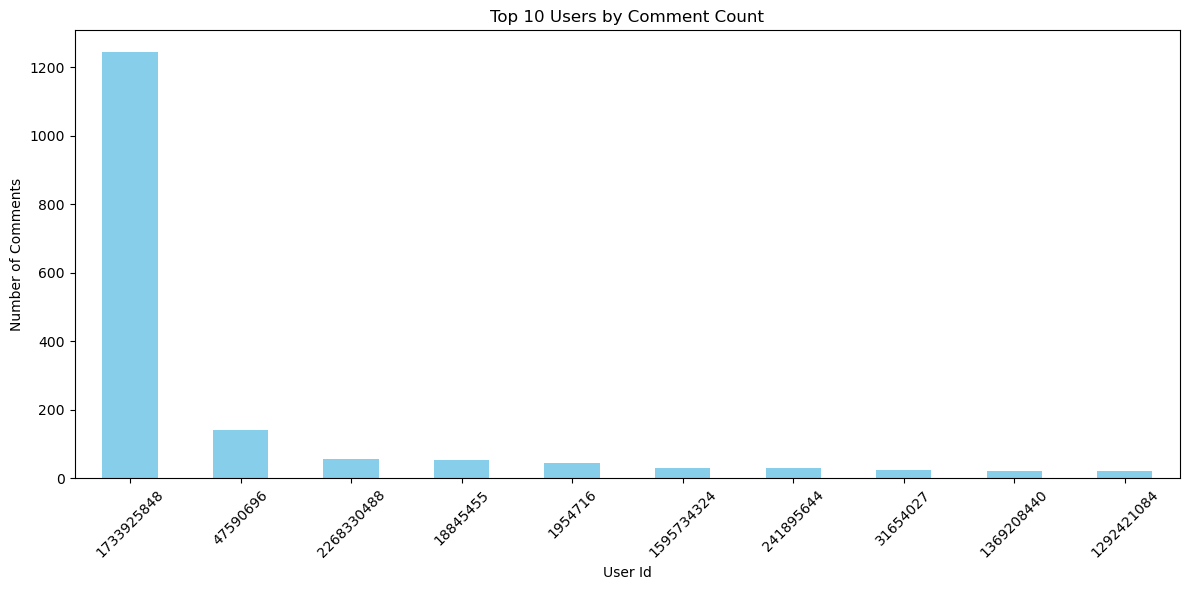

In [29]:
# Ensure 'User Id' column exists and contains valid data
data = data[data['User Id'].notna()]
data['User Id'] = data['User Id'].astype(str)

# Count the number of unique users
unique_users_count = data['User Id'].nunique()

# Group by user to analyze comment activity
user_comment_activity = data['User Id'].value_counts().reset_index()
user_comment_activity.columns = ['User Id', 'Comment Count']

# Display the results
print(f"Total Unique Users: {unique_users_count}")
print("Top 10 Users by Comment Count:")
print(user_comment_activity.head(10))

# Save the results to a CSV file
user_comment_activity.to_csv("user_comment_activity.csv", index=False)

# Optionally, visualize the top users
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
user_comment_activity.head(10).set_index('User Id')['Comment Count'].plot(kind='bar', color='skyblue')
plt.title('Top 10 Users by Comment Count')
plt.ylabel('Number of Comments')
plt.xlabel('User Id')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:


# Assuming `data` is your dataset with a 'Comment Text' column
data['compound'] = data['Comment Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Categorize sentiments based on compound scores
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['compound'].apply(categorize_sentiment)

# Group by season and sentiment
grouped_comments = data.groupby(['Season', 'Sentiment'])['Comment Text'].apply(list).reset_index()

# Save to Excel
output_file = "Seasonal_Sentiment_Comments.xlsx"
grouped_comments.to_excel(output_file, index=False)

output_file


'Seasonal_Sentiment_Comments.xlsx'